## Megan Hoeksema
## Assignment 3: Decision Trees

### Packages

In [378]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, zero_one_loss, classification_report, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, plot_roc_curve, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, validation_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

### Question 1

For a presidential election, campaign organizers for both the Republican and Democrat parties are interested in identifying undecided voters who would consider voting for their party. The file BlueOrRed.csv (provided on canvas) contains data on a sample of voters with tracked variables including: whether or not they are undecided regarding their candidate preference, age, whether they own a home, gender, marital status, household size, income, years of education, and whether they attend church. For this dataset, you would use the Undecided variable as your output variable and the rest of the variables as your input variables. You want to predict whether a candidate is undecided(Undecided=1) or decided(Undecided=0). 

#### 1A. Upload the data into Python and check for missing data. If there is any missing data, drop the cases that have the missing data. 

In [379]:
# load dataset

presDF = pd.read_csv('BlueOrRed.csv')

presDF.head(5)

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church,Undecided
0,51,1,1,1,4,171.0,15,0,1
1,46,1,1,1,6,420.0,15,1,0
2,55,1,0,1,6,132.0,16,0,1
3,50,1,0,1,4,18.0,8,0,0
4,49,1,1,1,2,66.0,15,1,1


In [380]:
# Check for missing data

presDF.isna().sum()

Age              0
HomeOwner        0
Female           0
Married          0
HouseholdSize    0
Income           0
Education        0
Church           0
Undecided        0
dtype: int64

There are no missing values in the dataframe.

#### 1B. Normalize the continuous variables using min-max normalization. You should obtain a new dataset that has your normalized continuous input variables, the categorical input variables (the categorical input variables are fine and don’t need to be normalized), and your output variable.

In [381]:
scaler = MinMaxScaler()
contCols = ['Age', 'HouseholdSize', 'Income', 'Education']
contCols
presDF.loc[:,contCols] = scaler.fit_transform(presDF.loc[:,contCols])
presDF.head(5)

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church,Undecided
0,0.523810,1,1,1,0.500000,0.306422,0.583333,0,1
1,0.444444,1,1,1,0.833333,0.763303,0.583333,1,0
2,0.587302,1,0,1,0.833333,0.234862,0.666667,0,1
3,0.507937,1,0,1,0.500000,0.025688,0.000000,0,0
4,0.492063,1,1,1,0.166667,0.113761,0.583333,1,1


#### 1C. Why do you think using min-max normalization is a better choice for this situation compared to using other scalers such as the Standard Scaler which standardizes the data?

MinMaxScaler preserves the shape of the original distribution.

#### 1D. Use the train_test_split() function in the sklearn.model_selection module in scikit-learn to split the data into training and test sets. Your test set should be 30% of the entire data. Print the shape of the X_train, y_train, X_test and y_test data. You can use the default value of the random state in splitting the data, which is random_state=42. 

In [382]:
X = presDF.drop(columns = ['Undecided'])
y = presDF['Undecided']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print("Sizes of training and test sets:", [len(elem) for elem in [X_train, X_test, y_train, y_test]])

Sizes of training and test sets: [7000, 3000, 7000, 3000]


#### 1E. Construct a decision tree and fit the tree into the data. Then use your decision tree model to make predictions on the training set as well as on the test set. Assign your results to y_train_pred and y_test_pred respectively. Print out the first 100 predictions for each of the  y_train_pred and y_test_pred. 

In [383]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
preds = clf.predict(X_train)

print(preds[0:100])

[0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0
 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1]


In [384]:
preds_test = clf.predict(X_test)

print(preds_test[0:100])

[0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0]


#### 1F. Find the overall accuracy of the tree model on the training set and on the test set. Use the accuracy_score() function in the sklearn.metrics module. Does the tree overfit the model? Why or why not?  

In [385]:
print('accuracy_score of training set: ' + str(accuracy_score(y_train, preds)))

accuracy_score of training set: 1.0


In [386]:
print('accuracy_score of test set: ' + str(accuracy_score(y_test, preds_test)))

accuracy_score of test set: 0.9686666666666667


#### Does the tree overfit the model? Why or why not?

The tree does not overfit the model because both the accuracies of the train and test sets are very high and close together.

#### 1G. Also, use the .score() method of the tree estimator to find the overall accuracy on the training set and test set. 

In [387]:
print('score of training set: ' + str(clf.score(X_train, y_train)))

score of training set: 1.0


In [388]:
print('score of test set: ' + str(clf.score(X_test, y_test)))

score of test set: 0.9686666666666667


#### 1H. Use the zero_one_loss() function inside the sklearn.metric module to compute the overall prediction error of the tree model on the test set and training set. 

In [389]:
print('zero_one_loss of training set: ' + str(zero_one_loss(y_train, preds)))

zero_one_loss of training set: 0.0


In [390]:
print('zero_one_loss of test set: ' + str(zero_one_loss(y_test, preds_test)))

zero_one_loss of test set: 0.031333333333333324


### Question 2
Do other assessment of your model using the following tools in sklearn.metrics module

#### 2A. Generate the classification report using the classification_report () 

In [391]:
print(classification_report(y_test, preds_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1814
           1       0.96      0.97      0.96      1186

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



#### 2B. Generate the confusion matrix using confusion_matrix() 

In [392]:
print(confusion_matrix(y_test, preds_test))

[[1761   53]
 [  41 1145]]


#### 2C. Generate the precision score using precision_score() 

In [393]:
precision_score(y_test, preds_test)

0.9557595993322203

#### 2D. Generate the recall score using recall_score()

In [394]:
recall_score(y_test, preds_test)

0.9654300168634065

#### 2E. Generate the f1 score using f1_score()

In [395]:
f1_score(y_test, preds_test)

0.9605704697986577

#### 2F. When is it more appropriate to use f1 score (or precision score and recall) compared to using the overall accuracy to evaluate your model?

F1 score is more appropriate to use when the data has an uneven class distribution

#### 2G. Generate a roc curve using plot_roc_curve() 

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


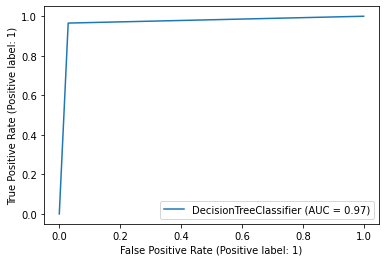

In [396]:
plot_roc_curve(clf, X_test, y_test)

#### 2H. Plot the confusion matrix using plot_confusion_matrix

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


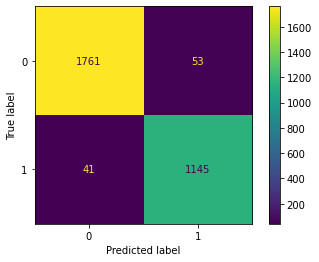

In [397]:
plot_confusion_matrix(clf, X_test, y_test)

### Question 3
You will now use cross validation to find better accuracy scores as well as to tune your hyperparameters. The hyperparameters of a decision tree as shown below. We are more interested in optimizing the depth of the tree (max_depth). 

In [398]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

#### 3A. First retrieve the maximum depth of this decision tree. Use clf.tree_.max_depth where clf is the name of your estimator and tree is the module in sklearn. 

In [399]:
clf.tree_.max_depth

18

#### 3B. You will find the optimal depth of the tree by tuning the max_depth hyperparameter. Write a for loop to iteratively compute the overall error rate of the model on the test set only for the possible values of the maximum depth of the tree. 

#### Then plot the overall error rate on the y-axis and the maximum depth of the tree on the x-axis. Also use np.argmin() on the error rates you obtained to retrieve the optimal maximum depth of the tree with the least error rate. Does this value match with what you see on your plot? 

In [400]:
error = []
depth = range(1, clf.tree_.max_depth)
for i in depth:
    tree_clf = tree.DecisionTreeClassifier(max_depth = i)
    tree_clf = tree_clf.fit(X_train, y_train)
    preds= tree_clf.predict(X_test)
    error.append(zero_one_loss(y_test, preds))

print(error)

[0.31799999999999995, 0.19599999999999995, 0.07766666666666666, 0.027666666666666617, 0.018333333333333313, 0.015000000000000013, 0.01766666666666672, 0.01866666666666672, 0.022666666666666613, 0.023333333333333317, 0.02533333333333332, 0.030333333333333323, 0.027666666666666617, 0.030333333333333323, 0.031000000000000028, 0.02966666666666662, 0.030333333333333323]


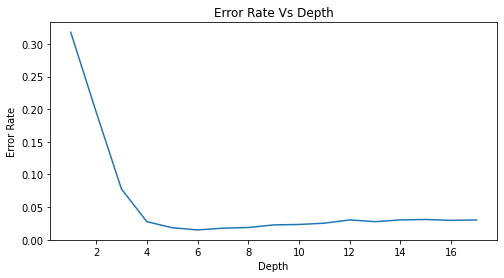

In [401]:
plt.figure(figsize = (8,4))

plt.plot(depth, error)
plt.title("Error Rate Vs Depth")
plt.xlabel("Depth")
plt.ylabel("Error Rate")

plt.show()

In [402]:
np.argmin(error)

5

With 5 being the index, the optimal Max Depth = 6

#### Does this value match with what you see on your plot?

Yes, the value matches

#### 3C. Now, you will still find the optimal maximum depth of the decision tree model using grid search cross validation. Additionally, you will be simultaneously optimizing the max_features hyperparameter as well. You can check the documentation to see what these hyperparameters represent. You will use the GridSearchCV() constructor inside the sklearn.model_selection module. Make sure to pass the arguments (estimator and param_grid into the GridSearchCV() constructor. Set the parameter cv=8. Do you have the same optimal maximum depth as you got in the question above?  

In [403]:
param_grid = {'max_depth': range(1, clf.tree_.max_depth), 'max_features':[0.2, 0.4, 0.6, 0.8]}

grid_search = GridSearchCV(clf, param_grid, cv = 8)
grid_search.fit(X_test, y_test)
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=6, max_features=0.8)

#### Do you have the same optimal maximum depth as you got in the question above?

Yes, the values do match

#### 3D. You will tune the maximum depth hyperparameter again using cross validation but this time, you will use the cross_val_score() function inside the sklearn.model_selection module. You will use this cross_val_score() function in combination with a for loop to find the optimal maximum depth of the tree.

#### Track the error rate for each depth and plot the error rates versus the corresponding maximum depths of the tree. Also use the np.argmin() on the error rates to retrieve the optimal maximum depth , corresponding to the lowest error rate. Does the retrieved optimal maximum depth look like what you see on your plot? 

In [410]:
scores_error = []
depth = range(1, clf.tree_.max_depth)

for i in depth:
    tree_clf = tree.DecisionTreeClassifier(max_depth = i)
    tree_clf = tree_clf.fit(X_train, y_train)
    scores = cross_val_score(estimator = tree_clf, X = X_train, y = y_train, scoring = 'accuracy', cv = 8)
    preds2 = cross_val_predict(tree_clf, X_test, y_test)
    scores_error.append(zero_one_loss(y_test, preds2))

print(scores_error)

[0.31799999999999995, 0.20366666666666666, 0.07066666666666666, 0.02633333333333332, 0.019333333333333313, 0.019000000000000017, 0.021333333333333315, 0.022333333333333316, 0.022333333333333316, 0.02633333333333332, 0.027666666666666617, 0.028666666666666618, 0.030333333333333323, 0.03066666666666662, 0.03266666666666662, 0.030000000000000027, 0.031333333333333324]


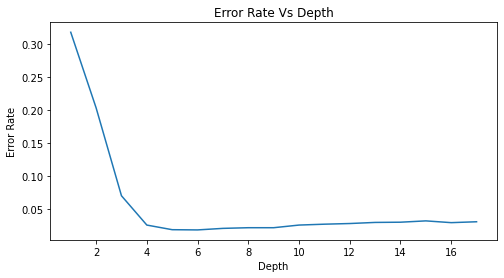

In [411]:
plt.figure(figsize = (8,4))

plt.plot(depth, scores_error)
plt.title("Error Rate Vs Depth")
plt.xlabel("Depth")
plt.ylabel("Error Rate")

plt.show()

In [412]:
np.argmin(scores_error)

5

With 5 being the index, the optimal Max Depth = 6

#### Does the retrieved optimal maximum depth look like what you see on your plot? 

Yes, the value matches

#### 3E. You will use another approach to plot the error rates versus the maximum depth of the tree. Here, you would use the validation_curve() function inside the sklearn.model_selection module. This function implements cross validation and returns the training accuracy scores and test (validation) accuracy scores for each iteration in the k-fold cross validation, for each of the hyperparameter values. You will need to aggregate the scores using np.mean(axis=1) to get the average of the accuracy scores for all iterations, for each hyperparameter value. Use these average accuracy scores to obtain corresponding error rates for the training and test (validation) sets. Then plot the error rates on the training set versus the maximum depth values. Also plot on the same figure, the error rates of the test (or validation) set versus the maximum depth values. What is the optimal maximum depth?

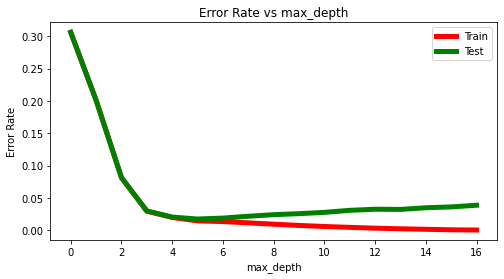

In [317]:
train_acc, test_acc = validation_curve(clf, X_train, y_train, param_name ="max_depth", 
                                       param_range = range(1,clf.tree_.max_depth), cv=8)

train_ave = np.mean(train_acc, axis=1)

train_error = []
for value in train_ave:
    train_error.append(1-train_ave)
    
test_ave = np.mean(test_acc, axis=1)

test_error = []
for value in test_ave:
    test_error.append(1-test_ave)

plt.figure(figsize=(8, 4)) 
plt.title("Error Rate vs max_depth")
plt.xlabel("max_depth")
plt.ylabel("Error Rate")
plt.plot(1-train_ave, color="red", lw=5)
plt.plot(1-test_ave, color="green", lw=5)
plt.legend(["Train", "Test"])
plt.show()

In [318]:
np.argmin(train_error)

16

In [319]:
np.argmin(test_error)

5

#### Question 4

Find your own dataset suitable for classification with at least three input variables and 200 cases: You will build a decision tree classifier and a random forest classifier. Find some interesting dataset instead of the popular iris data, etc. Address the following and include code/output snippets from b) to f). Include the response under each sub question. 

#### 4A. State your research question

Are decision trees and random forest good models for predicting whether or not someone is considered overweight based on their blood pressure and smoking status?

#### 4B. Data pre-processing (to the extent deemed necessary)

In [360]:
# load dataset

bloodDF = pd.read_csv('blood1.csv')

bloodDF.head(5)

,Unnamed: 0,SystolicBP,Smoke,Overwt
0,1,133,0,2
1,2,115,1,0
2,3,140,1,1
3,4,132,0,2
4,5,133,0,1


In [361]:
bloodDF.isna().sum()

Unnamed: 0    0
SystolicBP    0
Smoke         0
Overwt        0
dtype: int64

In [362]:
scaler = MinMaxScaler()
contCols = ['SystolicBP']
contCols
bloodDF.loc[:,contCols] = scaler.fit_transform(bloodDF.loc[:,contCols])
bloodDF.head(5)

,Unnamed: 0,SystolicBP,Smoke,Overwt
0,1,0.420382,0,2
1,2,0.305732,1,0
2,3,0.464968,1,1
3,4,0.414013,0,2
4,5,0.420382,0,1


#### 4C. Data splitting 

In [363]:
X = bloodDF.drop(columns = ['Overwt'])
y = bloodDF['Overwt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print("Sizes of training and test sets:", [len(elem) for elem in [X_train, X_test, y_train, y_test]])

Sizes of training and test sets: [350, 150, 350, 150]


#### 4D. Model construction (a decision tree and a random forest)

In [364]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

clf_rf = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [365]:
# Acccuracy of Train Set

preds_tree_train = clf.predict(X_train)
print('accuracy_score of Decision Tree Model: ' + str(accuracy_score(y_train, preds_tree_train)))

preds_forest_train = clf_rf.predict(X_train)
print('accuracy_score of Random Forest Model: ' + str(round(accuracy_score(y_train, preds_forest_train),2)))

accuracy_score of Decision Tree Model: 1.0
accuracy_score of Random Forest Model: 0.51


In [366]:
# Accuracy of Test Set

preds_tree = clf.predict(X_test)
print('accuracy_score of Decision Tree Model: ' + str(round(accuracy_score(y_test, preds_tree),2)))

preds_forest = clf_rf.predict(X_test)
print('accuracy_score of Random Forest Model: ' + str(round(accuracy_score(y_test, preds_forest),2)))

accuracy_score of Decision Tree Model: 0.35
accuracy_score of Random Forest Model: 0.47


/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


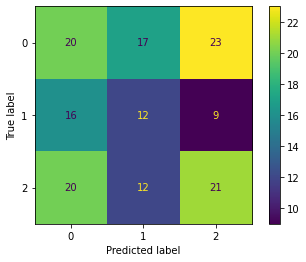

In [367]:
plot_confusion_matrix(clf, X_test, y_test)

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


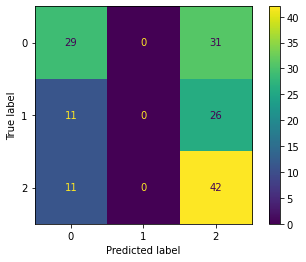

In [368]:
plot_confusion_matrix(clf_rf, X_test, y_test)

#### 4E.Hyperparameter tuning (for each model, tune the hyperparameter that is important to you and use any of the methods for hyperparameter tuning learned in class such as cross validation with for loop, gridsearch cross validation, etc. You could tune more than a single parameter for each model if you want). 

In [369]:
clf_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [370]:
param_grid_tree = {'max_depth': range(1, clf.tree_.max_depth), 'max_features':[0.2, 0.4, 0.6, 0.8]}

grid_search = GridSearchCV(clf, param_grid_tree, cv = 8)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, max_features=0.2)

In [371]:
param_grid_rf = {'max_features':[0.2, 0.4, 0.6, 0.8], 'n_estimators':[3, 10, 30, 100], 
                 'max_depth': range(1, clf_rf.max_depth)}

grid_search_rf = GridSearchCV(clf_rf, param_grid_rf, cv = 8)
grid_search_rf.fit(X_train, y_train)
grid_search_rf.best_estimator_

RandomForestClassifier(max_depth=1, max_features=0.8, n_estimators=30,
                       random_state=0)

#### 4F. Use the best or optimal parameter values to build a model, then compute the accuracy score for the decision tree and for the random forest). 

In [372]:
final_tree = grid_search.best_estimator_
final_tree.fit(X_test, y_test.values.ravel())
final_tree_preds = final_tree.predict(X_test)

print('accuracy_score of Decision Tree Model: ' + str(round(accuracy_score(y_test, final_tree_preds),2)))

accuracy_score of Decision Tree Model: 0.45


In [373]:
final_rf= grid_search_rf.best_estimator_
final_rf.fit(X_test, y_test.values.ravel())
final_rf_preds = final_rf.predict(X_test)

print('accuracy_score of Random Forest Model: ' + str(round(accuracy_score(y_test, final_rf_preds),2)))

accuracy_score of Random Forest Model: 0.48


#### 4G. Discuss about overfitting for both models and, also discuss which model is better for classification for your dataset and why?

Based on the accuracy of the test and train sets, it appears that decision tree is possibly overfitting. For decision tree, the accuracy of the training set was 1.0, however, the accuracy of the test set was 0.51 indicating that the model is overfitting. Random forest does not appear to be overfitting, however, the accuracy of the model is not great. For the training set, the accuracy of the model is 0.35, however, the accuracy of the test set is 0.47. 

After tuning a few parameters for both models, based on the accuracy Random Forest appears to be better for this dataset, but not by much. The accuracy for decision tree is 0.45 and the accuracy for random forest is 0.48.